In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def load_img():
  blank_img=np.zeros((600,600))
  font = cv2.FONT_HERSHEY_SIMPLEX
  cv2.putText(blank_img,text='ABCDE',org=(50,300),fontFace=font,fontScale=5,color=(255,255,255),thickness=25)
  return blank_img

In [4]:
def display_img(img):
  fig = plt.figure(figsize=(12,10))
  ax = fig.subplots(1)
  ax.imshow(img,cmap='gray')

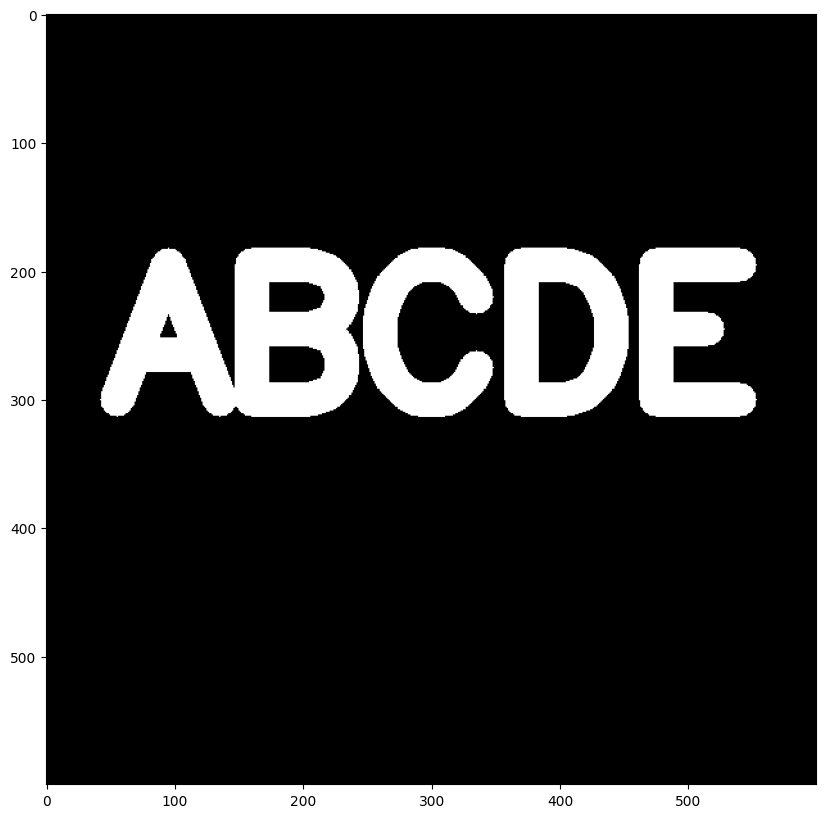

In [5]:
img = load_img()
display_img(img)

In [6]:
# erosion - erodes away boundaries of foreground objects

In [7]:
kernel = np.ones((5,5),dtype=np.uint8)
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

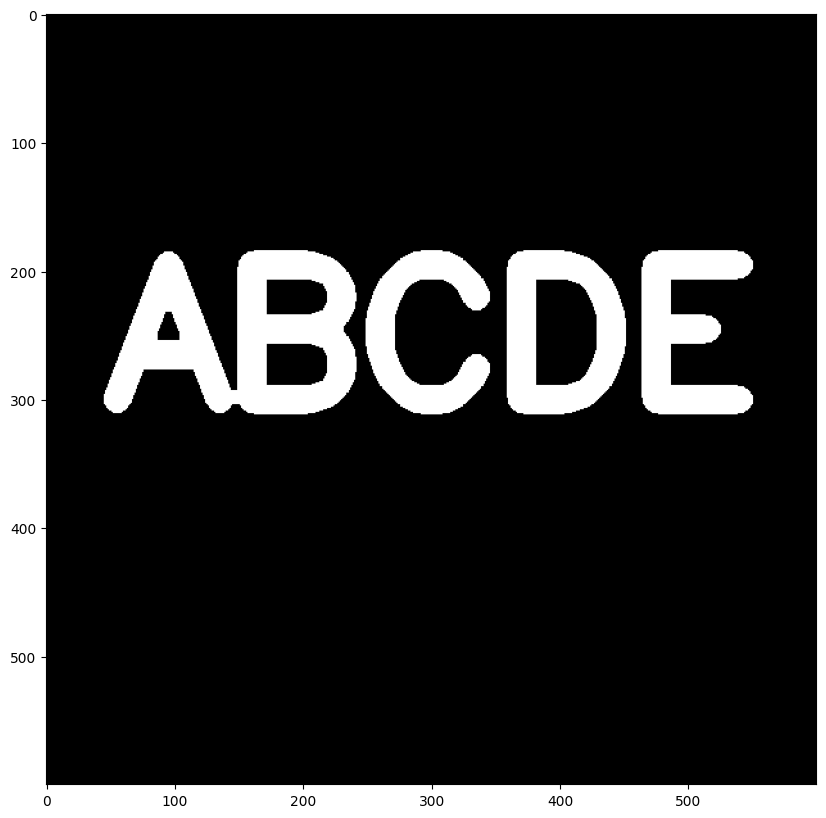

In [8]:
# iterations is how many passes you want to do
result = cv2.erode(img,kernel,iterations=1)
display_img(result)

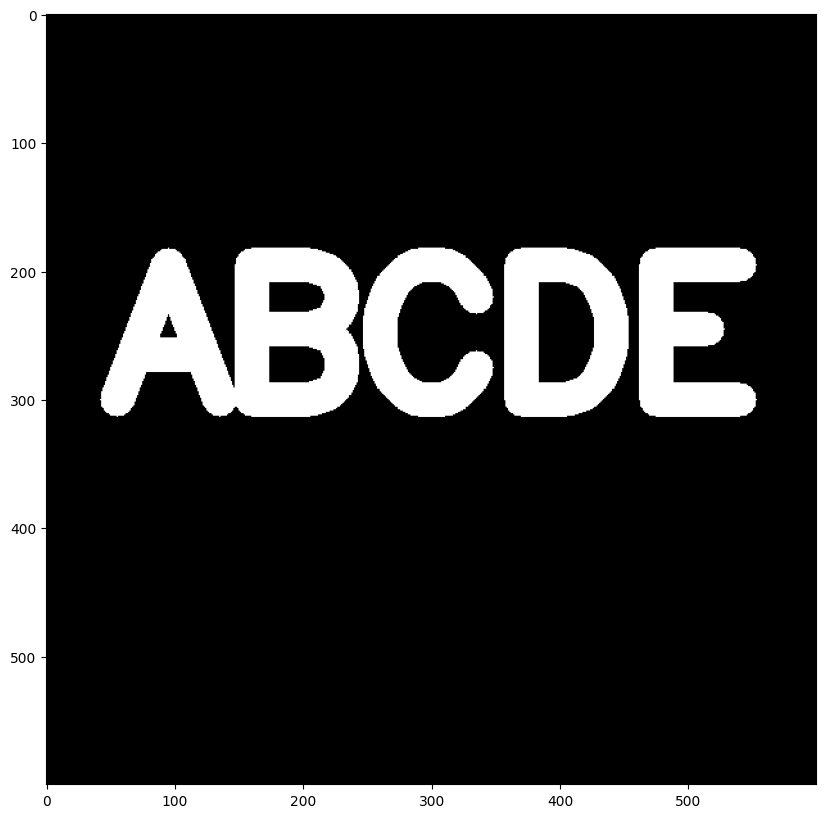

In [9]:
# Dilation is the opposite of erosion
# Add more to the foreground
# Good for removing background noise

#reload
img = load_img()
display_img(img)

In [10]:
# create white noise

white_noise = np.random.randint(low=0,high=2,size=(600,600))
white_noise

array([[0, 1, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 1, 0],
       [0, 1, 1, ..., 1, 0, 1],
       ...,
       [1, 0, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 1, 1, 0],
       [0, 0, 1, ..., 0, 0, 1]])

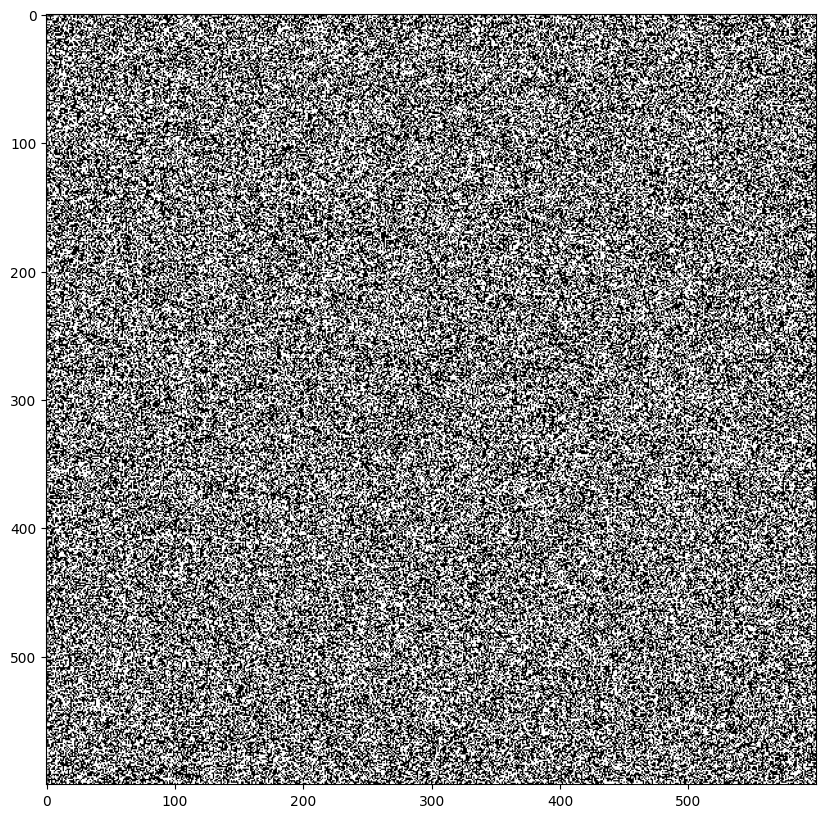

In [11]:
display_img(white_noise)

In [12]:
# put the white noise into the original text image

img.max()

np.float64(255.0)

In [13]:
# make the noise on the same scale as the image (from 0 to 1, change to 0 to 255)

white_noise = white_noise * 255

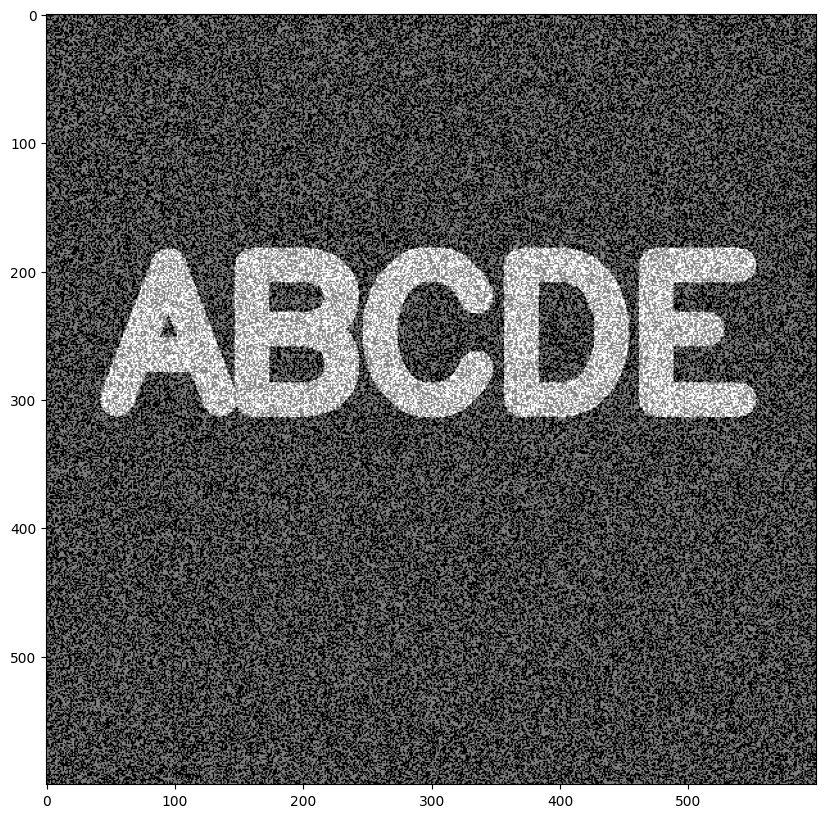

In [14]:
# Combine the noise and the image

noise_img = white_noise + img
display_img(noise_img)

In [15]:
opening = cv2.morphologyEx(noise_img,cv2.MORPH_OPEN,kernel)

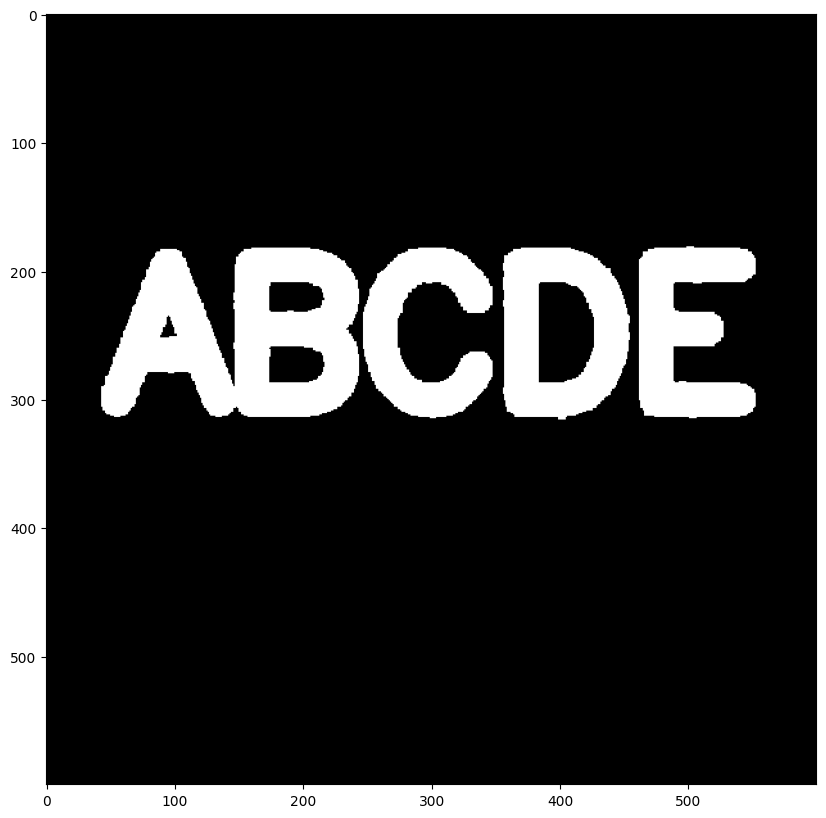

In [16]:
display_img(opening)

In [17]:
# Create an image with foreground noise

In [20]:
# reload image
img = load_img()

# create black noise
black_noise = np.random.randint(low=0,high=2,size=(600,600))
black_noise = black_noise * -255
black_noise

array([[   0,    0,    0, ...,    0, -255, -255],
       [   0,    0, -255, ...,    0,    0,    0],
       [   0,    0, -255, ..., -255, -255,    0],
       ...,
       [   0,    0, -255, ...,    0,    0,    0],
       [-255, -255,    0, ..., -255, -255,    0],
       [   0,    0,    0, ...,    0, -255, -255]])

In [21]:
black_noise_img = img + black_noise
black_noise_img

array([[   0.,    0.,    0., ...,    0., -255., -255.],
       [   0.,    0., -255., ...,    0.,    0.,    0.],
       [   0.,    0., -255., ..., -255., -255.,    0.],
       ...,
       [   0.,    0., -255., ...,    0.,    0.,    0.],
       [-255., -255.,    0., ..., -255., -255.,    0.],
       [   0.,    0.,    0., ...,    0., -255., -255.]])

In [22]:
# change -255 to 0

black_noise_img[black_noise_img== -255] = 0
black_noise_img.min()

np.float64(0.0)

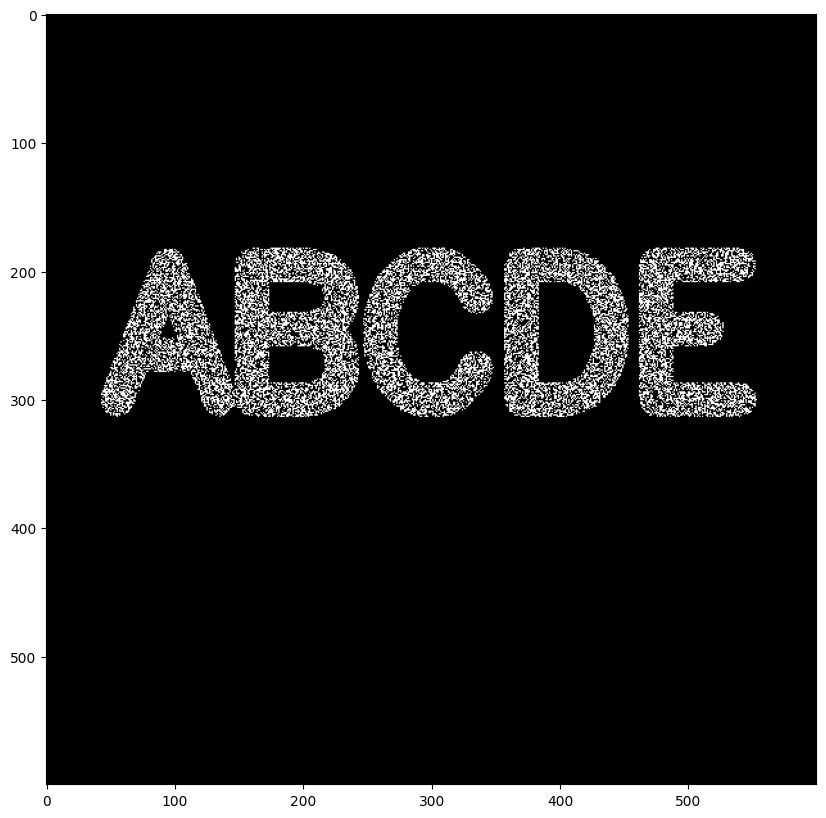

In [23]:
display_img(black_noise_img)

In [24]:
# use closing to clean up the noise on the foreground

closing = cv2.morphologyEx(black_noise_img,cv2.MORPH_CLOSE,kernel)

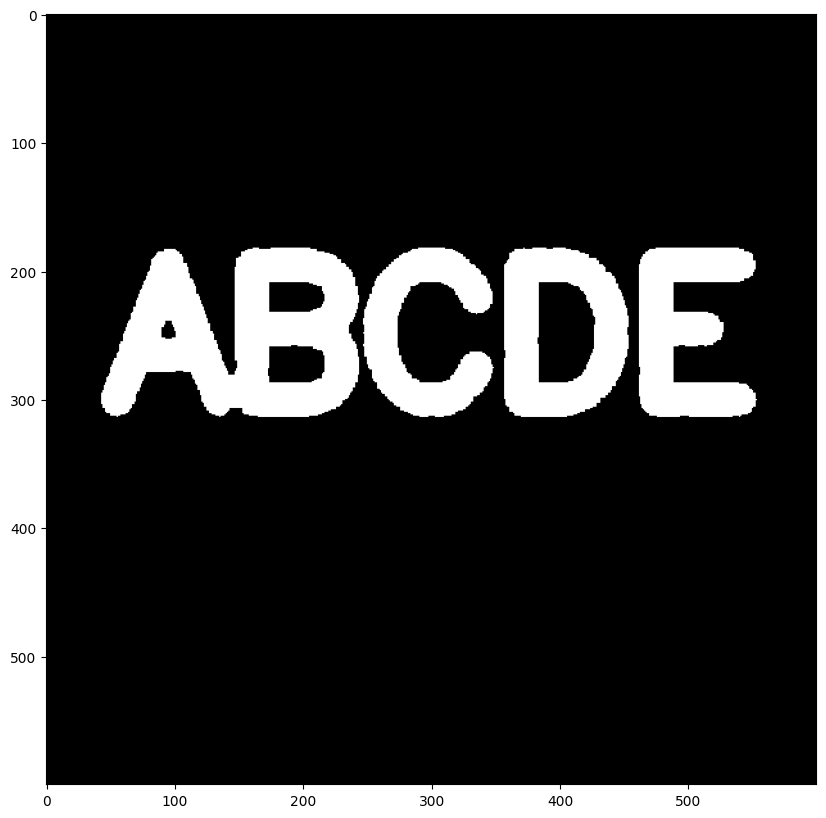

In [25]:
display_img(closing)

In [26]:
# morphological gradient - takes the difference between dilation and erosion of an image

# reload image
img = load_img()

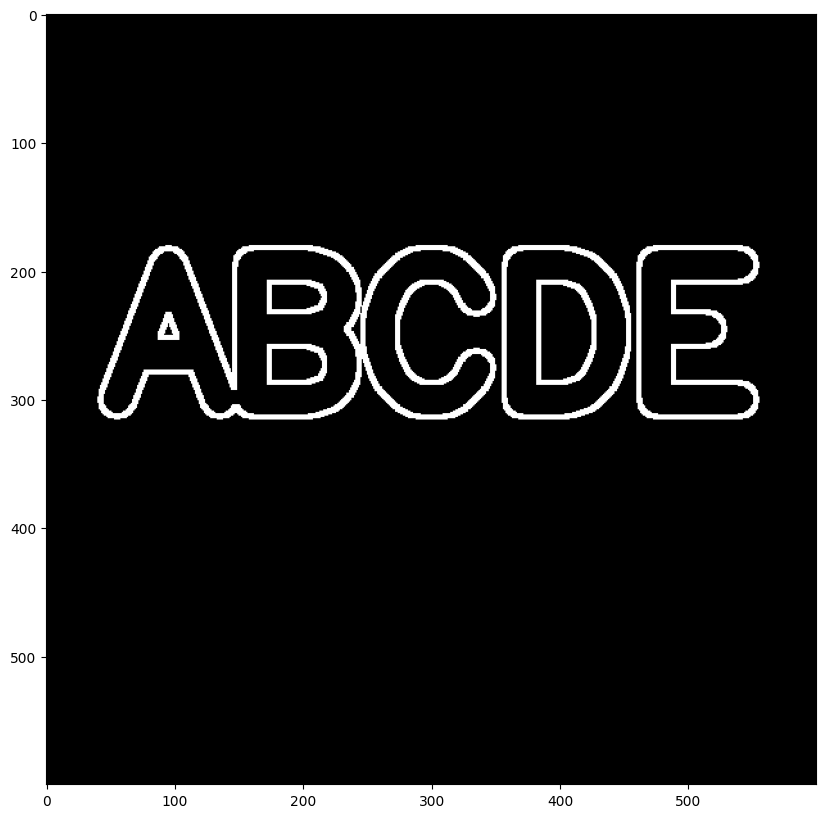

In [ ]:
# for text, it grabs the edge - edge detection

gradient = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)
display_img(gradient)